# Red Convolucional con imagenes importadas en memoria

## Cargamos librerías Keras/Tensorflow

In [2]:
# Importamos las librerías de keras/tensorflow
from tensorflow import keras
from tensorflow.keras import layers

## Importamos el dataset

In [3]:
# Importamos la librería de los datasets de keras y cogemos el de mnist
from tensorflow.keras.datasets import mnist

# Obtenemos los datos de entrenamiento y test
# separados en las imagenes y las etiquetas de las mismas
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Tenemos 60.000 imagenes de entrenamiento y 10.000 de test
# Cada imagen es de 28x28=748 pixels

# Reestructuramos los datos de las imágenes para que se traten como imagen
train_images = train_images.reshape((60000, 28, 28, 1))
# Dividimos entre 255 para "normalizar" el dato y dejarlo entre 0 7 1
train_images = train_images.astype("float32") / 255
# Reestructuramos los datos de las imágenes para que se traten como imagen
test_images = test_images.reshape((10000, 28, 28, 1))
# Dividimos entre 255 para "normalizar" el dato y dejarlo entre 0 7 1
test_images = test_images.astype("float32") / 255


## Construimos el Modelo

In [5]:
# Creamos el modelo

# Vamos a usar el Funcional API de kertas

# Capa de entrada formato 28x28 pixels y sólo un canal de color (escala de grises
inputs = keras.Input(shape=(28, 28, 1))

# Añadimos capa de convolución con 32 filtros de tamaño 3 y activación relu
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
# Añadimos capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)
# Añadimos capa de convolución con 64 filtros de tamaño 3 y activación relu
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# Añadimos capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)


# Aplanamos los datos
x = layers.Flatten()(x)

# Ponemos una capa densamente conectada
x = layers.Dense(512, activation="relu")(x)

# La salida la hacemos de tipo softmax con 10 neuronas (números de clases diferentes)
outputs = layers.Dense(10, activation="softmax")(x)

# Construimos el modelo de la Red Neuronal Convolucional
model = keras.Model(inputs=inputs, outputs=outputs)

# Mostramos el Modelo creado
model.summary()

# Compilamos el modelo definiendo el optimizador, función de pérdida y métrica
# RMSProp, sparse_categorical_crossentropy, accuracy
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 843,658 (3.22 MB)

 Trainable params: 843,658 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamos el Modelo

In [6]:
# Realizamos el entrenamiento
# 5 épocos (iteraciones), con tamaño de batch de 64
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9055 - loss: 0.2957
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9870 - loss: 0.0422
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9925 - loss: 0.0236
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9970 - loss: 0.0109


## Visualizamos el entrenamiento

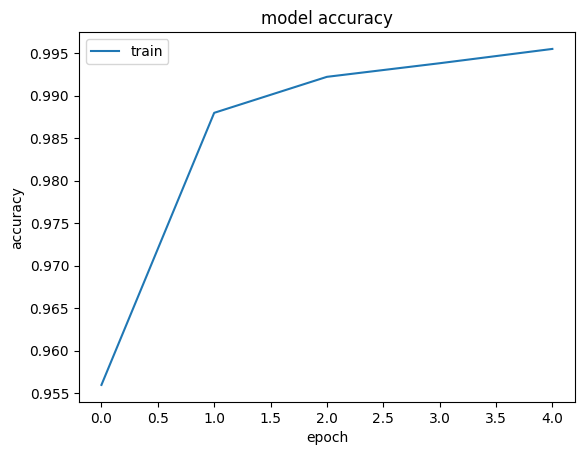

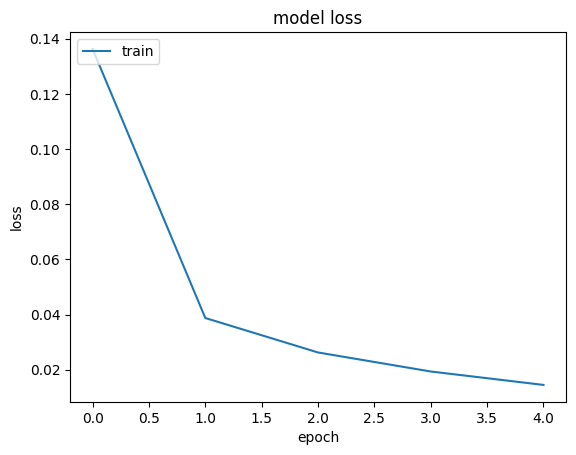

In [71]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Evaluamos el modelo con los datos de Test

In [ ]:
# Evaluamos el modelo con los datos de test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

## Hacemos predicciones con los datos de test 

In [14]:
predicciones = model.predict(test_images,verbose=0)
print(predicciones.argmax(axis=-1))
print(test_labels)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


# Red Convolucional con imágenes en un directorio

## Cargamos librerías Keras/Tensorflow y para visualizar imagenes

In [18]:
# Importamos las librerías de keras/tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow.keras.datasets as tfds



## Descargamos el dataset desde una URL

In [19]:
# Cargamos librería para trabajar con ficheros
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Descargamos el fichero con todas las imágenes y 
# lo desempaquetamos
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

# Mostramos cuantas imágenes hay
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


## Preparamos los objetos para leer desde el directorio las imágenes

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


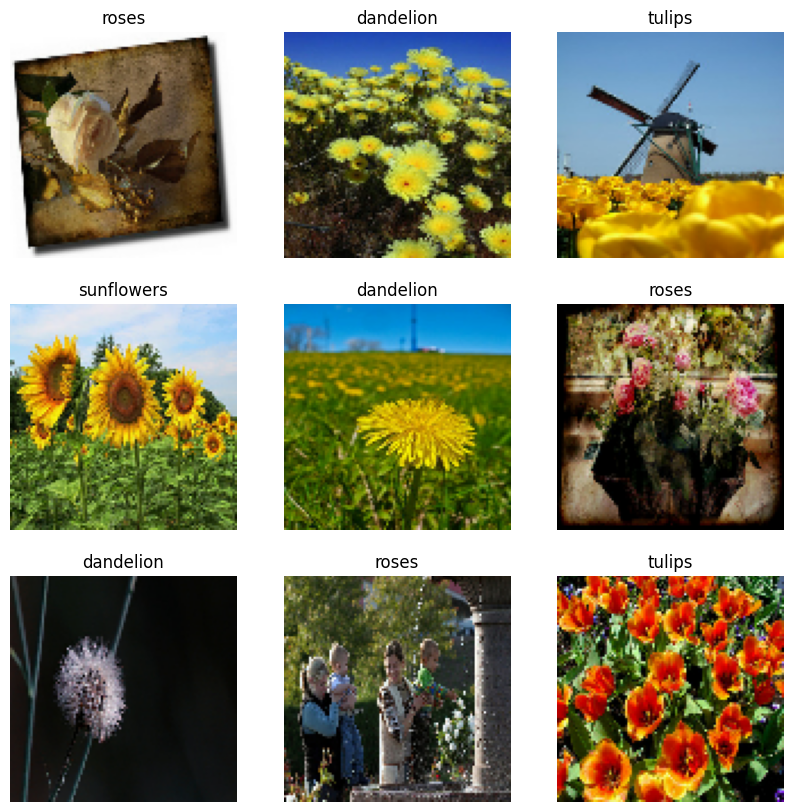

In [21]:

batch_size = 32
img_height = 100
img_width = 100

# Vamos a tener un directorio llamado flower_photos
# que contiene un subdirectorio por cada una de los 5 tipos de flores
# roses, daisy, dandelion, sunflowers, tulips

# Definimos el objeto para leer del directorio de entreanmiento
# Con el validation_split partimos el dataset en 2
# Entrenamiento con el 80%
# Validación con el 20%

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Definimos 
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

num_classes = 5

## Creamos el Modelo

In [23]:
# Creamos el modelo
# Capa de entrada formato 180x180 pixels y 3 canales de color RGB
inputs = keras.Input(shape=(img_width, img_height, 3))

# Dividimos entre 255 para "normalizar" el dato y dejarlo entre 0 7 1
x = layers.Rescaling(1./255)(inputs),
# Añadimos capa de convolución con 32 filtros de tamaño 3 y activación relu
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
# Añadimos capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)
# Añadimos capa de convolución con 64 filtros de tamaño 3 y activación relu
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# Añadimos capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)
# Añadimos capa de convolución con 128 filtros de tamaño 3 y activación relu
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# Añadimos capa de pooling, tipo max y de tamaño 2
x = layers.MaxPooling2D(pool_size=2)(x)

# Aplanamos los datos
x = layers.Flatten()(x)

# Ponemos una capa densamente conectada
x = layers.Dense(512, activation="relu")(x)

# La salida la hacemos de tipo softmax con 5 neuronas (números de clases diferentes)
outputs = layers.Dense(num_classes, activation="softmax")(x)

# Construimos el modelo de la Red Neuronal Convolucional
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,649,925 (25.37 MB)

 Trainable params: 6,649,925 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamos el modelo

In [27]:
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4846 - loss: 1.3588 - val_accuracy: 0.4728 - val_loss: 1.3250
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5916 - loss: 1.0633 - val_accuracy: 0.5926 - val_loss: 1.2690
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6982 - loss: 0.8112 - val_accuracy: 0.4782 - val_loss: 1.4527
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8026 - loss: 0.5536 - val_accuracy: 0.6104 - val_loss: 1.4050
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8952 - loss: 0.3199 - val_accuracy: 0.6035 - val_loss: 1.5151
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9288 - loss: 0.2479 - val_accuracy: 0.6349 - val_loss: 1.4869
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9531 - loss: 0.1824 - val_accuracy: 0.6008 - val_loss: 2.3206
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9420 - loss: 0.2242 - val_accuracy: 0.6403 - v

## Visualizamos el entrenamiento

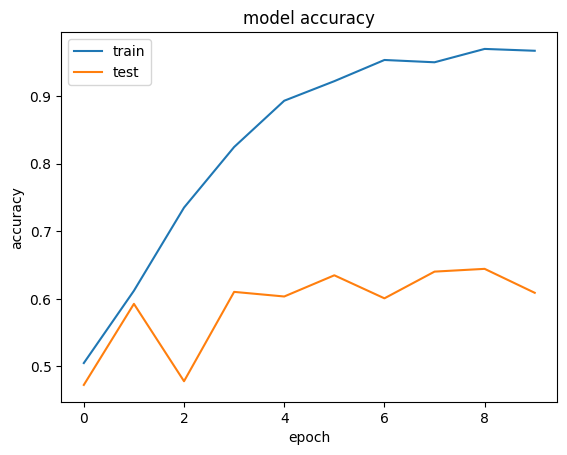

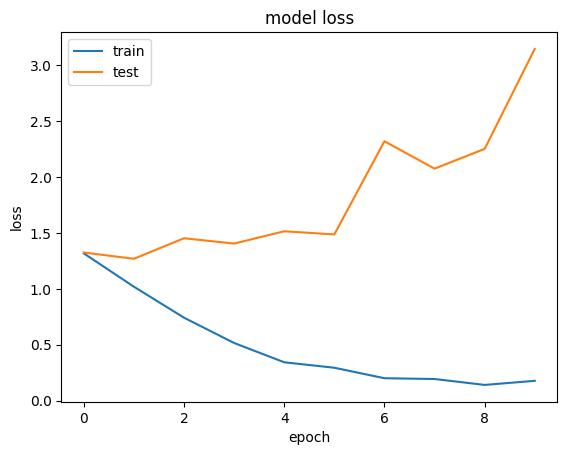

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluamos el modelo

In [41]:
# Evaluamos el modelo con los datos de test
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.3f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5986 - loss: 2.8788
Test accuracy: 0.609
